Dear reader, running some sections more than once will result in errors.

Re-running the entire notebook will run cleanly

**Opgave 1**

In [183]:
## Fetch
# UNCOMMENT TO DOWNLOAD
!wget -c https://github.com/SDS-AAU/M1-2019/raw/master/data/trips.csv
!wget -c https://github.com/SDS-AAU/M1-2019/raw/master/data/people.csv
!wget -c https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv

## import libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td


--2019-09-11 09:05:49--  https://github.com/SDS-AAU/M1-2019/raw/master/data/trips.csv
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SDS-AAU/M1-2019/master/data/trips.csv [following]
--2019-09-11 09:05:50--  https://raw.githubusercontent.com/SDS-AAU/M1-2019/master/data/trips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2019-09-11 09:05:51--  https://github.com/SDS-AAU/M1-2019/raw/master/data/people.csv
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... conne

In [184]:
## Læs data, drop observationer hvor dato mangler
trip = pd.read_csv("trips.csv")
a = len(trip) # antal obervationer i datasættet efter indlæsning

trip.dropna(subset=["date_start", "date_end"], inplace=True)
b = len(trip) # antal obervationer i datasættet efter frasotering af manglende datoer
c = 100 - ((b / a) * 100)
print(a-b , "of", a , "(", c ,"% ) observations dropped because of missing dates.", b , "observations left")

# Ryd op
del a , b , c

175 of 46510 ( 0.3762631692109153 % ) observations dropped because of missing dates. 46335 observations left


In [0]:
## Opgave 1.a Konverter rejsedatoer
trip["date_start"] = pd.to_datetime(trip.date_start, format="%Y-%m-%d", errors='coerce')
trip["date_end"] = pd.to_datetime(trip.date_end, format="%Y-%m-%d", errors='coerce')

In [0]:
## Opgave 1.b Udregn rejsetid
trip["rn"] = pd.to_numeric(trip.date_end) - pd.to_numeric(trip.date_start) # Numerisk rejsetid
trip["rejsetid"] = pd.to_timedelta(trip.rn) # "Normal" rejsetid

In [187]:
## Opgave 1.c Fjern observationer under 1% kvantil og over 97% kvantil

a = len(trip)

# Find kvantiler af hele sættet.
qu = trip.rn.quantile(.97) # Upper quantile threshold
ql = trip.rn.quantile(.01) # Lower quantile threshold

# Sorter
trip = trip[trip.rn < qu]
trip = trip[trip.rn > ql]

b = len(trip)
c = 100 - ((b / a) * 100)

print(a-b , "of", a , "(", c ,"% ) observations dropped because values where below 1% quantile or above 97% quantile.", b , "observations left")
# Ryd op
del a , b , c , qu , ql

2970 of 46335 ( 6.4098413726125045 % ) observations dropped because values where below 1% quantile or above 97% quantile. 43365 observations left


In [188]:
# Opgave 1.d Indlæs countrylist
cl = pd.read_csv("countrylist.csv")

# Forbered merge
a = len(trip)

# Fjern observationer uden country code
trip.dropna(subset=["country_code"], inplace=True)
b = len(trip)
c = 100 - ((b / a) * 100)
print(a-b , "of", a , "(", c ,"% ) observations dropped because of missing county codes.", b , "observations left")

# Ryd op
del a , b , c

# Test for mismatch
d = trip.country_code.unique()
e = cl.alpha_2.unique()
f = [x for x in d if x not in e]

print("The following country codes are present in trips.csv but not in countrylist.csv:" , f )
print("While the countrycodes may be valid, such as 'UK', they are discarded because the assignment dictates a merge, during which they will be lost anyway")

# Fjern observationer med country_code der ikke findes i countrylist.csv
a = len(trip)
trip = trip[trip.country_code.isin(f) == False]
b = len(trip)
c = 100 - ((b / a) * 100)
print(a-b , "of", a , "(", c ,"% ) observations dropped because their country code is not present in countrylist.csv.", b , "observations left")

# Ryd op
del a , b , c , d , e , f

# Merge
a = len(trip)
trip = trip.merge(cl, left_on='country_code', right_on='alpha_2')
b = len(trip)
c = 100 - ((b / a) * 100)
print(a-b , "of", a , "(", c ,"% ) observations lost in merge.", b , "observations left")

# Ryd op
del a , b , c

550 of 43365 ( 1.2683039317421816 % ) observations dropped because of missing county codes. 42815 observations left
The following country codes are present in trips.csv but not in countrylist.csv: ['UK', 'CB', 'AA', 'IA', 'KS', 'VB', 'CT', 'OI']
While the countrycodes may be valid, such as 'UK', they are discarded because the assignment dictates a merge, during which they will be lost anyway
1739 of 42815 ( 4.06166063295575 % ) observations dropped because their country code is not present in countrylist.csv. 41076 observations left
0 of 41076 ( 0.0 % ) observations lost in merge. 41076 observations left


In [189]:
# Sæt rejsestartdato til index
trip = trip.set_index("date_start")
trip = trip.sort_index(ascending=1)
print("Index i 'trap' sat til 'date_start' og datasæt sorteret efter dato.")

Index i 'trap' sat til 'date_start' og datasæt sorteret efter dato.


**Opgave 2**

In [190]:
## Read data
pp = pd.read_csv("people.csv")

## Opgave 2.a How many people have at least completed high school
pp.dropna(subset=["education_raw"], inplace=True)
print(len(pp) , "have completed high school")

## Opgave 2.b How many software developers have a master's
pp.dropna(subset=["work_raw"])
pps = pp[(pp["work_raw"].str.contains("Software Dev")==True) & (pp["education_raw"].str.contains("Master")==True)]
print(len(pps) , "Software developers have a Master's Degree")

## Opgave 2.c Who is the person with a Master's Degree that has the highest number of followers?
ppmax = pp[(pp.followers == max(pp.followers)) & (pp.education_raw.str.contains("Master")==True)]
a = list(ppmax["username"]) ## @levelsio has the highest numbers of followers

print(a , "has the most followers")

451 have completed high school
57 Software developers have a Master's Degree
['@levelsio'] has the most followers


**Opgave 3**

In [191]:
## Opgave 3.a Country with most travels
a = list(trip.country.unique())
a.sort()
b = pd.DataFrame(a)
b.columns = ["land"]
b["count"]=0
b.sort_values(by=['land'], inplace=True)

## Quite possibly the worst and most inefficient data frame string counter loop ever written
c = 0
while c < len(a):
    b.at[c, "count"] = len(trip[trip["country"] == a[c]])
    c += 1

b.sort_values(by=['count'], inplace=True, ascending=False)


print("The countries with the most travels is seen in the sorted list below", "\n" , b)

# Ryd op
del a , b , c


The countries with the most travels is seen in the sorted list below 
                        land  count
162           United States   6965
152                Thailand   3278
143                   Spain   1875
56                  Germany   1812
54                   France   1391
70                Indonesia   1305
34                    China   1066
74                    Italy   1043
106             Netherlands    988
76                    Japan    972
30                   Canada    959
167                 Vietnam    941
8                 Australia    916
93                 Malaysia    863
97                   Mexico    859
123                Portugal    805
69                    India    647
23                   Brazil    557
137               Singapore    516
35                 Colombia    505
128                  Russia    467
67                  Hungary    453
108             New Zealand    442
122                  Poland    413
9                   Austria    412
59                 

In [192]:
## Opgave 3.b Country with most travels in 2017
t17 = trip.loc["2017-1-1" : "2017-12-31"]

a = list(t17.country.unique())
a.sort()
b = pd.DataFrame(a)
b.columns = ["land"]
b["count"]=0
b.sort_values(by=['land'], inplace=True)

## Quite possibly the worst and most inefficient data frame string counter loop ever written
c = 0
while c < len(a):
    b.at[c, "count"] = len(t17[t17["country"] == a[c]])
    c += 1 

b.sort_values(by=['count'], inplace=True, ascending=False)


print("The countries with the most travels in 2017 is seen in the sorted list below", "\n" , b)

# Ryd op
del a , b , c

The countries with the most travels in 2017 is seen in the sorted list below 
                        land  count
134           United States   1824
127                Thailand    894
120                   Spain    598
48                  Germany    456
46                   France    391
59                Indonesia    375
137                 Vietnam    357
81                   Mexico    316
103                Portugal    305
63                    Italy    299
89              Netherlands    293
77                 Malaysia    287
5                 Australia    246
65                    Japan    241
24                   Canada    239
28                    China    223
29                 Colombia    192
19                   Brazil    169
58                    India    169
114               Singapore    153
108                  Russia    147
56                  Hungary    139
91              New Zealand    137
125                  Taiwan    127
102                  Poland    127
50         

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


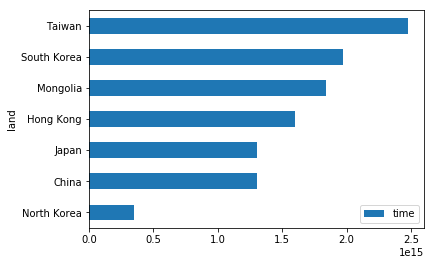

In [193]:
## Opgave 3.c Which is the country in 'Eastern Asia' where travellers spent on average least time when going there? Provide a visualization.
tea = trip[trip.sub_region.str.contains("Eastern Asia")==True]

a = list(tea.country.unique())
a.sort()
b = pd.DataFrame(a)
b.columns = ["land"]
b["time"]=0
b.sort_values(by=['land'], inplace=True)

## Quite possibly the worst and most inefficient data frame string counter loop ever written
c = 0
while c < len(a):
    b.at[c, "time"] = tea[tea["country"] == a[c]].rejsetid.mean()
    c += 1
b.set_index("land")
b.sort_values(by=['time'], inplace=True, ascending=True)
b.plot(x="land", y="time", kind="barh")

# Ryd op
del a , b , c

In [194]:
## Opgave 3.d Do nomads that indicate working in “Software Dev” tend to have shorter or longer trips on average?

psoft = pd.read_csv("people.csv")
psoft = psoft[psoft.work_raw.str.contains("Software Dev")==True]


tsoft = trip.merge(psoft, left_on='username', right_on='username')

tidn = trip.rejsetid.mean()
tids = tsoft.rejsetid.mean()

result = "longer."
if tidn > tids :
  result = "shorter."

if tidn == tids :
  result = "identical"
  
print("Travel times for Software Devs are", result , "\n" , "Note! Since the question compared software devs travel time to 'average' and not to 'non-software developers' for this calulation, software devs was not excluded form the average!")





Travel times for Software Devs are shorter. 
 Note! Since the question compared software devs travel time to 'average' and not to 'non-software developers' for this calulation, software devs was not excluded form the average!


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


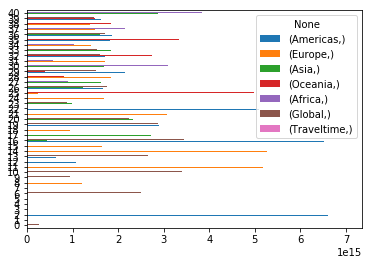

In [204]:
## Opgave 3.e Visualize over-time median trip duration overall (bonus: and split by world-region). You will get a weird looking plot :-)

## defining year addition (https://stackoverflow.com/questions/15741618/add-one-year-in-current-date-python)
def add_years(d, years):
    """Return a date that's `years` years after the date (or datetime)
    object `d`. Return the same calendar date (month and day) in the
    destination year, if it exists, otherwise use the following day
    (thus changing February 29 to March 1).

    """
    try:
        return d.replace(year = d.year + years)
    except ValueError:
        return d + (date(d.year + years, 1, 1) - date(d.year, 1, 1))

r = list(trip.region.unique())
r.append("Global")
r.append("Traveltime")
tmean = pd.DataFrame(columns=[r])

a = 1 # Year increment in mean travel time list
b = pd.to_datetime("1979-01-01", format="%Y-%m-%d", errors='coerce')
c = pd.to_datetime("2019-12-31", format="%Y-%m-%d", errors='coerce')
d = 0
## Time loop. Very inefficient when working with large dataframes

while b < c:
    e = add_years(b,a)
    f = int(1979 + (d * a))
    tloop = trip.loc[b:e]
    tmean.at[d,r[5]] = tloop.rejsetid.mean()
    tmean.at[d,r[6]] = int(f)
    for i in range(5):
      tmean.at[d,r[i]] = tloop[tloop.region.str.contains(r[i])==True].rejsetid.mean()
    d += 1
    b = add_years(b,a)

#tmean.sort_values(by=["Traveltime"], inplace=True, ascending=True)

tmean.plot(kind="barh")
    
# Ryd op
del a , b , c , d , e , f , r , tmean